In [2]:
!pip3 install matplotlib
!pip3 install tensorflow
!pip3 install scikit-learn

In [3]:
from keras.datasets import fashion_mnist

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
(x_train1_full, y_train1_full),( x_test_full, y_test_full) = fashion_mnist.load_data()





#splitting data
x_train_full , x_val_full, y_train_full, y_val_full = train_test_split(x_train1_full, y_train1_full, 
                                                              test_size=0.2  ,  random_state=42, stratify= y_train1_full)


In [8]:
print(x_train_full.shape)
print(x_val_full.shape)
print(y_train_full.shape)
print(y_val_full.shape)

(48000, 28, 28)
(12000, 28, 28)
(48000,)
(12000,)


<h1><b>Data Analysis</b></h1>

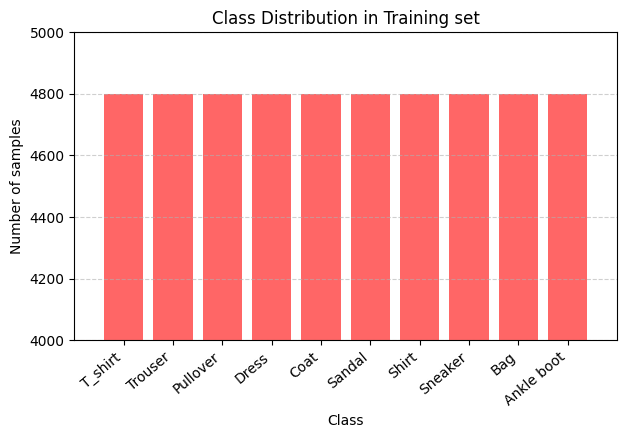

In [9]:
class_names =["T_shirt","Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
unique, counts = np.unique(y_train_full, return_counts=True)
plt.figure(figsize=(7, 4))
plt.bar(unique, counts, color="red" , alpha=0.6)
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class Distribution in Training set")
plt.xticks(unique, class_names, rotation=40, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.axis((-1,10,4000,5000))
plt.show()

In [10]:
old_global_mean =np.mean(x_train_full, axis=(0,1,2))
old_global_std =np.std(x_train_full, axis=(0,1,2))
print("Global Mean of the pixel values", old_global_mean)
print("Global Standart Deviation of the pixel values", old_global_std)

for class_id in range(10):
    indices = np.where(y_train_full == class_id)[0]
    
    class_images = x_train_full[indices]
    
    mean_intensity = class_images.mean()
    
    print(f"- Mean instensity {class_names[class_id]}: {mean_intensity:.2f}")

Global Mean of the pixel values 72.99447648278061
Global Standart Deviation of the pixel values 90.0593388742391
- Mean instensity T_shirt: 82.85
- Mean instensity Trouser: 56.99
- Mean instensity Pullover: 96.49
- Mean instensity Dress: 66.12
- Mean instensity Coat: 98.10
- Mean instensity Sandal: 34.80
- Mean instensity Shirt: 84.83
- Mean instensity Sneaker: 42.84
- Mean instensity Bag: 90.17
- Mean instensity Ankle boot: 76.76


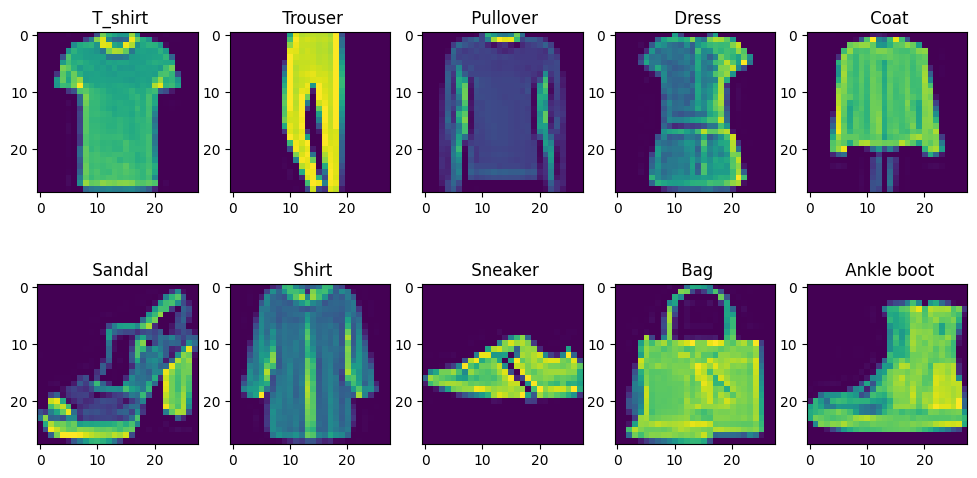

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for i in range(10):
    index_of_all_images = np.where(y_train_full == i)
    random_index = np.random.choice(index_of_all_images[0])

    axes[i].imshow(x_train_full[random_index])
    axes[i].set_title(f" {class_names[y_train_full[random_index]]}")
    






<h1><b>Data Normalization</b></h1>

In [12]:
from sklearn.preprocessing import StandardScaler

x_train_full_flat = x_train_full.reshape(x_train_full.shape[0],-1)
x_val_full_flat = x_val_full.reshape(x_val_full.shape[0],-1)
x_test_full_flat = x_test_full.reshape(x_test_full.shape[0],-1)

scalar = StandardScaler()

x_train_scaled = scalar.fit_transform(x_train_full_flat)

x_val_scaled = scalar.transform(x_val_full_flat)

x_test_scaled = scalar.transform(x_test_full_flat)

new_global_mean =np.mean(x_train_scaled,axis=(0,1))
new_global_std = np.std(x_train_scaled,axis=(0,1))
print("New global mean is: ",new_global_mean,"and Old global mean is: ", old_global_mean)

print("New global standart deviation is: ",new_global_std, "and Old global standart deviation is: ", old_global_std)


New global mean is:  -1.0392291713498064e-18 and Old global mean is:  72.99447648278061
New global standart deviation is:  0.9999999999999895 and Old global standart deviation is:  90.0593388742391


<h1>KNN classifier</h1>

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix# useful functions for evaluation
from sklearn.metrics import ConfusionMatrixDisplay


In [14]:
k_values =[1,3,5,7]
best_k = None
best_accuracy = 0
best_metric = ""
accuracies={}

metrics=["euclidean","manhattan"]
for m in metrics:
    accuracies[m] =[]
    for k in k_values:
        knn= KNeighborsClassifier(n_neighbors=k,metric=m)
        knn.fit(x_train_scaled,y_train_full)

        y_val_predict = knn.predict(x_val_scaled)
        accuracy_val = accuracy_score(y_val_full,y_val_predict)
        accuracies[m].append(accuracy_val)
        print(f"Validation accuracy using the metric as \"{m}\" and k={k} is {accuracy_val}")
        if accuracy_val > best_accuracy:
            best_accuracy = accuracy_val
            best_k = k
            best_metric = m

Validation accuracy using the metric as "euclidean" and k=1 is 0.8520833333333333
Validation accuracy using the metric as "euclidean" and k=3 is 0.8553333333333333
Validation accuracy using the metric as "euclidean" and k=5 is 0.8548333333333333
Validation accuracy using the metric as "euclidean" and k=7 is 0.85625
Validation accuracy using the metric as "manhattan" and k=1 is 0.857
Validation accuracy using the metric as "manhattan" and k=3 is 0.8630833333333333
Validation accuracy using the metric as "manhattan" and k=5 is 0.8660833333333333
Validation accuracy using the metric as "manhattan" and k=7 is 0.8643333333333333


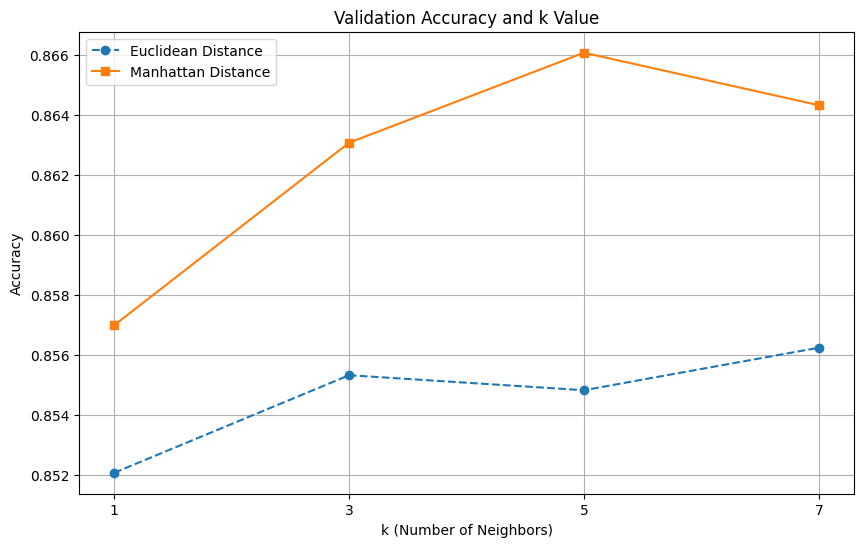

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(k_values, accuracies['euclidean'], marker='o', linestyle='--', label='Euclidean Distance')
plt.plot(k_values, accuracies['manhattan'], marker='s', linestyle='-', label='Manhattan Distance')

plt.title('Validation Accuracy and k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')

plt.xticks(k_values)

plt.legend()
plt.grid(True)

plt.show()

In [16]:
x_train_val_concat = np.concatenate([x_train_scaled,x_val_scaled])
y_train_val_concat = np.concatenate([y_train_full,y_val_full])
knn= KNeighborsClassifier(n_neighbors=best_k,metric=best_metric)
knn.fit(x_train_val_concat,y_train_val_concat)

y_test_predict = knn.predict(x_test_scaled)
accuracy_val = accuracy_score(y_test_full,y_test_predict)

report = classification_report(y_test_full, y_test_predict, target_names=class_names)

conf_matrix = confusion_matrix(y_test_full, y_test_predict)


print(f"Validation accuracy with best hypertuning using the metric as \"{best_metric}\" and k={best_k} is {accuracy_val}")

Validation accuracy with best hypertuning using the metric as "manhattan" and k=5 is 0.8613


In [ ]:

print(f"Overall Test Accuracy: {accuracy_val:.4f}\n")
print("Classification Report:")
print(report)

Overall Test Accuracy: 0.8613

Classification Report:
              precision    recall  f1-score   support

     T_shirt       0.77      0.86      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.73      0.80      0.76      1000
       Dress       0.90      0.88      0.89      1000
        Coat       0.77      0.77      0.77      1000
      Sandal       0.99      0.90      0.94      1000
       Shirt       0.66      0.58      0.61      1000
     Sneaker       0.91      0.96      0.94      1000
         Bag       0.98      0.94      0.96      1000
  Ankle boot       0.93      0.97      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



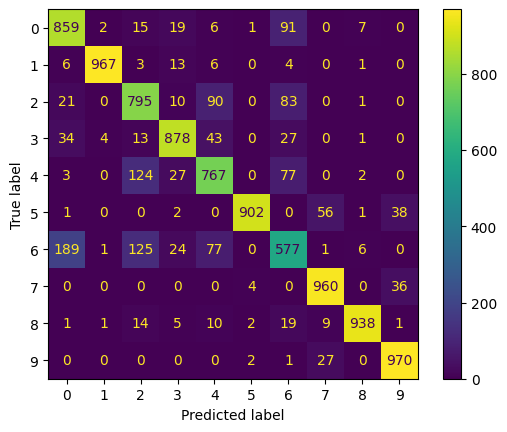

In [17]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test_full, y_pred=y_test_predict)

<h1>Training time and prediction time for KNN</h1>

In [19]:
import time

knn_final = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)

start_time_fit = time.time()
knn_final.fit(x_train_val_concat, y_train_val_concat)
end_time_fit = time.time()
fit_duration = end_time_fit - start_time_fit
print(f"Time for training: {fit_duration:.4f} seconds")

start_time_predict = time.time()
y_test_predict = knn_final.predict(x_test_scaled)
end_time_predict = time.time()
predict_duration = end_time_predict - start_time_predict
print(f"Time of prediction: {predict_duration:.4f} seconds")

Time for training: 0.0977 seconds
Time of prediction: 44.4142 seconds


<h1>Error Analysis</h1>

In [ ]:
import numpy as np

row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums 
np.fill_diagonal(norm_conf_mx, 0) 

top_errors = []
for _ in range(3):
    
    max_val_pos = np.unravel_index(np.argmax(norm_conf_mx, axis=None), norm_conf_mx.shape)
    true_label_idx, pred_label_idx = max_val_pos
    
    
    num_errors = conf_matrix[true_label_idx, pred_label_idx]
    true_label_name = class_names[true_label_idx]
    pred_label_name = class_names[pred_label_idx]
    
    top_errors.append(((true_label_idx, pred_label_idx), 
                       (true_label_name, pred_label_name), 
                       num_errors))
    
    
    norm_conf_mx[true_label_idx, pred_label_idx] = 0

print("Top 3 Most Confused Class Pairs:")
for i, ((_, _), (true_name, pred_name), count) in enumerate(top_errors):
    print(f"{i+1}. True: '{true_name}' vs. Predicted: '{pred_name}' ({count} errors)")

Top 3 Most Confused Class Pairs:
1. True: 'Shirt' vs. Predicted: 'T_shirt' (189 errors)
2. True: 'Shirt' vs. Predicted: 'Pullover' (125 errors)
3. True: 'Coat' vs. Predicted: 'Pullover' (124 errors)


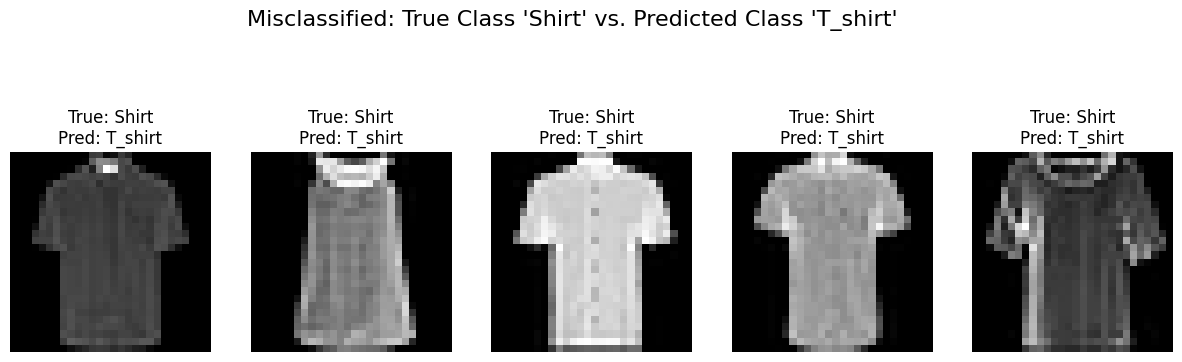

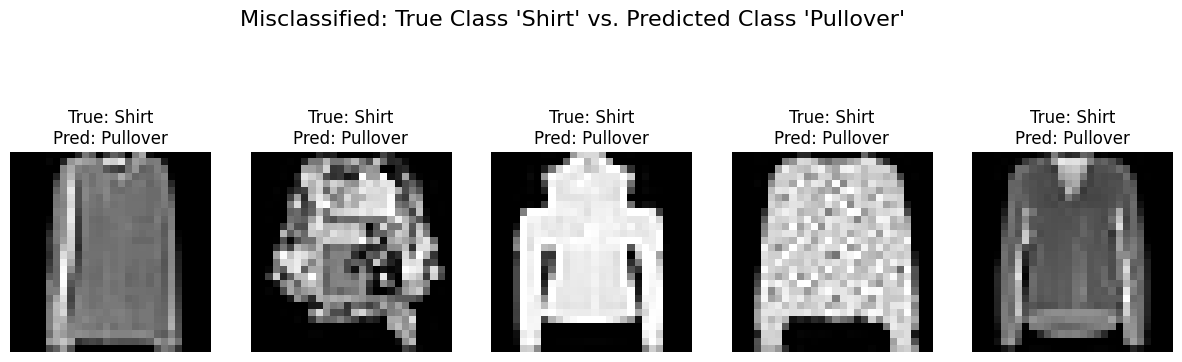

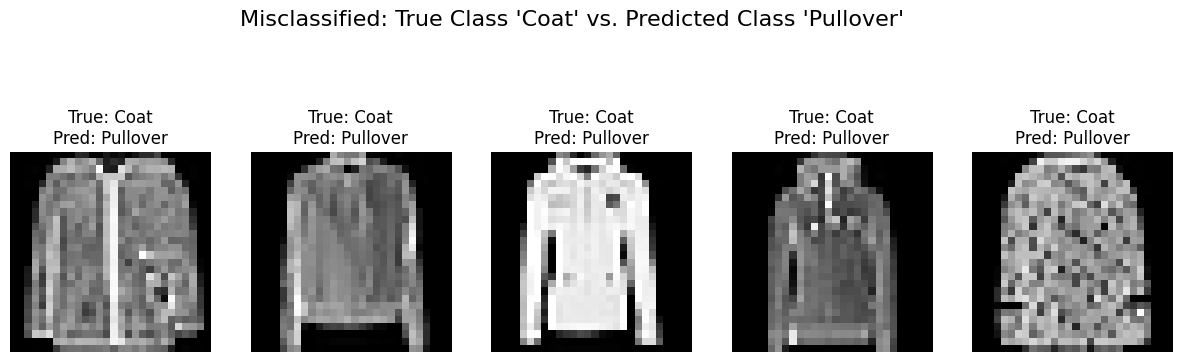

In [21]:
for (true_idx, pred_idx), (true_name, pred_name), _ in top_errors:
    
    error_indices = np.where((y_test_full == true_idx) & (y_test_predict == pred_idx))[0]
    
    
    num_samples_to_show = min(5, len(error_indices))
    if num_samples_to_show == 0:
        print(f"\nNo examples to show for True: '{true_name}' vs. Pred: '{pred_name}'")
        continue
        
    random_error_indices = np.random.choice(error_indices, size=num_samples_to_show, replace=False)
    
    fig, axes = plt.subplots(1, num_samples_to_show, figsize=(15, 5))
    fig.suptitle(f"Misclassified: True Class '{true_name}' vs. Predicted Class '{pred_name}'", fontsize=16)
    
    for i, img_index in enumerate(random_error_indices):
        ax = axes[i] if num_samples_to_show > 1 else axes
        ax.imshow(x_test_full[img_index], cmap='gray') 
        ax.set_title(f"True: {true_name}\nPred: {pred_name}")
        ax.axis('off')
        
    plt.show()